<ipython-input-2-95309a86e3b4>:12: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = img.imread("/content/pmd.jpg")


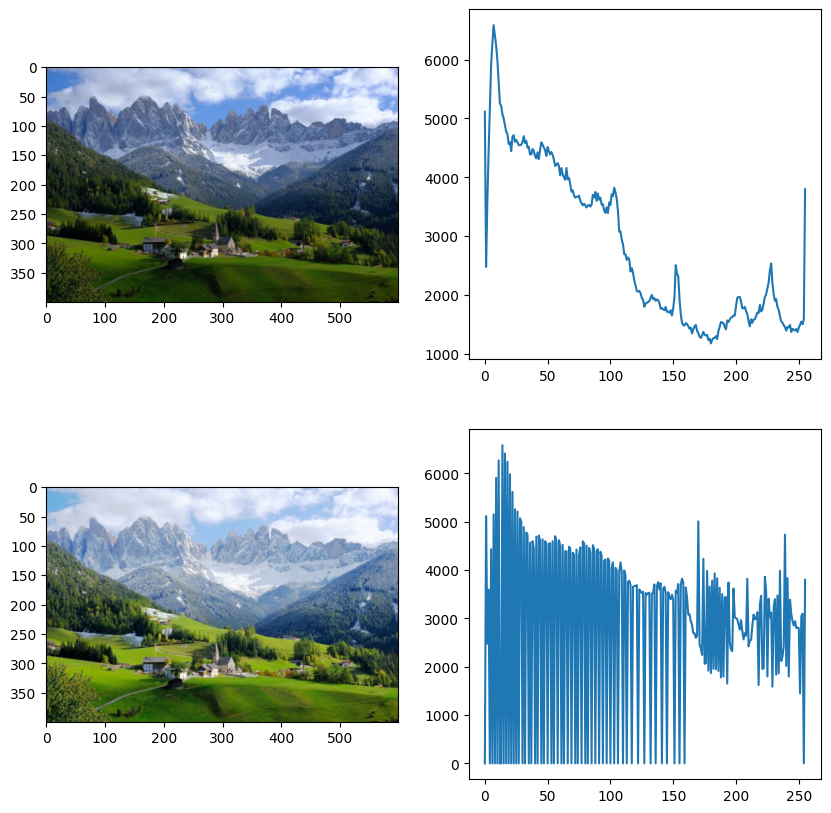

In [2]:
import imageio as img
import numpy as np
import matplotlib.pyplot as plt

def equalization(image):
    hist, bins = np.histogram(image.flatten(), bins=256, range=[0,256])
    cdf = hist.cumsum()
    cdf_normalized = (cdf/cdf.max()) * 255
    imgEqual = np.interp(image.flatten(), bins[:-1],cdf_normalized)
    return imgEqual.reshape(image.shape).astype(np.uint8)

image = img.imread("/content/pmd.jpg")
hist, bins = np.histogram(image.flatten(), bins=256, range=[0,256])

# Calculate the histogram of the equalized image
hist_e, _ = np.histogram(imgEqual.flatten(), bins=256, range=[0,256])

imgEqual = equalization(image)
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(image)
plt.subplot(2,2,2)
plt.plot(hist)
plt.subplot(2,2,3)
plt.imshow(imgEqual)
plt.subplot(2,2,4)
plt.plot(hist_e)
plt.show()